# Lecture 7 Constant Predictors (상수 예측기)

**EE104**    
Sanjay Lall and Stephen Boyd   
Stanford University    

Lecture 7&nbsp;&nbsp;&nbsp;&nbsp;[Video](https://youtu.be/opjG0pQi_yo?si=GnehkZV1Cu9MgtJR) / [Slides](https://ee104.stanford.edu/lectures/constant_predictors.pdf)

Bowon Kwon    
2025년 11월 4일 생성    
2025년 11월 5일 발제

## **1. 개요**

### 1.1. 7장의 위치

- 6장 경험적 위험 최소화(Empirical Risk Minimization)에 이어, 손실 함수(Loss Function) 선택이 예측 모델의 결과에 미치는 영향을 **가장 단순한 형태의 모델**인 Constant Predictors (상수 예측기, 상수 예측 변수)를 통해 직관적으로 보여주기 위한 장
- 예측 변수의 민감도(Sensitivity)를 제어하는 정규화(Regularization)가 필요 없어 **손실 함수만으로** 최적화 문제가 결정
- 다양한 손실 함수를 적용하여 ERM을 수행할 때 다음과 같이 대표적인 통계 요약치가 도출됨을 보여줌으로써, 손실 함수 선택이 예측 모델의 목표를 규정한다는 점을 명확히 함
    - Square Loss → Mean
    - Absolute Loss → Median
    - Tilted Absolute Loss → Quantile
- 9장 Non-Quadratic Losses에서 7장을 확장하여, 일반적인 예측 모델에 제곱 손실 외의 다양한 손실 함수를 적용할 때 발생하는 효과를 탐구





### 1.2. 통계적 위험 최소화(Statistical Risk Minimization; SRM) vs. 경험적 위험 최소화(Empirical Risk Minimization; ERM)

#### 1.2.1. **통계적 위험 최소화(SRM)**
    

* **모집단 전체(실제 데이터 분포 P)** 에 대한 **참된 기대 손실** 최소화
* 모델 일반화 능력의 궁극적 **이론적** 목표     
* 모든 입력 x, 출력 y 쌍에 대한 손실 함수(L)의 기댓값 계산    
* 현실적으로 데이터가 따르는 실제 분포 P를 알 수 없음, 이상적인 '진짜 위험'은 계산 불가

  $$
  \mathcal{L}(\theta)
  = \mathbb{E}_{(x, y) \sim P}
  \!\left[
    \ell\!\big(g_\theta(x),\, y\big)
  \right]
  $$

#### 1.2.2. **경험적 위험 최소화(ERM)**


* 실제 분포 P를 모르기 때문에 우리가 가진 **관측된 훈련 데이터 D**를 이용해 근사적으로 계산(**표본 평균 손실** 최소화)
* **대수의 법칙**에 따라, 충분히 많은 표본이 있으면 경험적 위험이 진짜 위험의 근사치로 수렴함을 전제한 **실용적 방법론** (SRM과 ERM의 차이가 '일반화 오류'로 나타나며, 표본이 충분히 크면 ERM이 SRM에 수렴)
* 훈련 데이터 n개에 대한 손실의 평균 계산
* 7장에서는 ERM의 원리를 가장 단순한 모델에 적용하여 손실을 최소화하는 $\theta$가 손실 함수의 형태에 따라 평균, 중앙값 등으로 결정됨을 보임

  $$
  \mathcal{L}(\theta)
  = \frac{1}{n}
  \sum_{i=1}^{n}
  \ell\!\big(g_\theta(x^{(i)}),\, y^{(i)}\big)
  $$

### 1.3. Constant Predictor (상수 예측기)란?

$\hat{y} = g_{\theta}(x) = \theta \in \mathbb{R}^m$

* 입력 특성 $x$에 전혀 의존하지 않고 항상 상수 값 $\theta$를 출력하는 모델
* 모델의 매개변수 $\theta \in \mathbb{R}^m$ 자체가 유일하게 학습되는 대상
* 입력 $x$에 완전히 비민감하므로, 모델의 복잡성을 제어하는 정규화 불필요

### 1.4. 손실 함수

#### 1.4.1. 손실 함수의 역할


* 우리가 가진 데이터는 $n$개의 관측된 결과값(Outcomes) $y^1, \dots, y^n \in \mathbb{R}^m$
* 손실 함수 $l(\hat{y}, y)$는 예측값 $\hat{y}$이 실제값 $y$를 얼마나 잘못(badly) 근사하는지 정량화


$l:\mathbb{R}^m \times \mathbb{R}^m \rightarrow \mathbb{R}$

$\mathcal{L}(\theta) = \frac{1}{n}\sum_{i=1}^{n}l(\theta,y^{i})$ (경험적 위험) 최소화하는 $\theta$를 찾는 것이 목표

#### 1.4.2. 스칼라 결과(Scalar Outcome, 출력 벡터의 차원 $m=1$)에 대한 주요 손실 함수

##### 1.4.2.1. **제곱 손실 (Squre Loss / Quadratic Loss / L2 Loss)**

* 가장 일반적인 형태의 손실 함수
* 작은 오차는 작게, 큰 오차는 크게 페널티 부과하여 오차가 클수록 페널티가 기하급수적으로 증가(오차에 매우 민감)
* 제곱 연산 덕분에 미분이 용이하여 최적화에 유리
* 최소화 결과로서 상수 예측 변수 $\theta^*$는 데이터의 **평균(Mean)**

$$l(\hat{y}, y) = (\hat{y} - y)^2$$

##### 1.4.2.2. **절대 손실 (Absolute Loss / L1 Loss)**

* 오차 크기에 비례하여 선형적으로 페널티를 부과하므로(부호는 무시) 제곱 손실에 비해 특이값에 덜 민감
* 미분 불가능한 뾰족점(Kink Point)이 있어 최적화 복잡할 수
* 최소화 결과로서 상수 예측 변수 $\theta^*$는 데이터의 **중앙값(Median)**

$$l(\hat{y}, y) = |\hat{y} - y|$$

##### 1.4.2.3. **분수 손실 (Fractional Loss / Relative Loss)**

* 주로 $y > 0$인 데이터(예: 가격, 트래픽)에서 사용
* 실제값과 예측값의 비율이 1일 때 손실이 0이 되며, 실제 $100$,예측 $50$이면 100% 오차
* 오차의 절대 크기보다는 상대적 비율을 중시($100$에 대해 $110$으로 예측하는 오차와 $10$에 대해 $11$로 예측하는 오차를 동일하게 취급)

$$l(\hat{y}, y) = \max \left\{ \frac{\hat{y}}{y}-1, \frac{y}{\hat{y}}-1 \right\} = \exp(|\log \hat{y} - \log y|) - 1$$

* 첫째 항 $\frac{\hat{y}}{y}-1$은 예측값이 실제값보다 클 때의 상대 오차    
둘째 항 $\frac{y}{\hat{y}}-1$은 예측값이 실제값보다 작을 때의 상대 오차    
* 두 항 중 큰 값(손실이 더 큰 쪽)만 선택하게 되어 '오차의 절댓값' 역할
* 로그 공간에서의 거리 $|\log \hat{y} - \log y|$에 지수함수를 적용한 형태로도 표현할 수 있음
* 첫째 항을 $r$로 놓으면, $r \ge 1$일 때는 첫째 항이 크고, $r \le 1$일 때는 둘째 항이 크며 다음과 같이 표현 가능
$$\ell(\hat{y}, y) = \max \left( r - 1, \frac{1}{r} - 1 \right) = e^{|\log r|} - 1$$

| 상황  | 실제값 $y$ | 예측값 $\hat{y}$ | 첫째 항 | 둘째 항 | 최종 손실 |
|------|-----------|-----------------|---------|----------------------------------|-------------|
| 완전 일치 | 2 | 2 | 0 | 0 | 0 |
| 과대추정 (25% 큼) | 2 | 2.5 | 0.25 | -0.2 | 0.25 |
| 과소추정 (50% 작음) | 2 | 1 | -0.5 | 1 | 1 |
| 과소추정 (매우 작음) | 2 | 0.5 | -0.75 | 3 | 3 |


#### 1.4.3. 벡터 결과($m>1$)에 대한 손실 함수

결과값 $y$가 벡터($m>1$)일 때는 벡터의 노름(Norm)을 사용하여 오차 크기 측정

##### 1.4.3.1. 벡터 제곱 손실 (Vector Quadratic Loss)

$$l(\hat{y}, y) = ||\hat{y} - y||_2^2$$

* 예측 오차 벡터의 유클리드 노름(Euclidean Norm)의 제곱
* 각 성분($j=1$부터 $m$까지)의 제곱 오차를 합산한 것과 같음
$$l(\hat{y}, y) = \sum_{j=1}^{m} (\hat{y}_j - y_j)^2$$

### 1.5. 볼록 함수와 최적화

#### 1.5.1. 볼록 함수의 정의

* 함수 $f: \mathbb{R}^k \to \mathbb{R}$가 볼록하다는 것은, 정의역 내 모든 $w, z \in \mathbb{R}^k$와 $\alpha \in [0, 1]$에 대해 다음 부등식을 만족함을 의미

$$f(\alpha w+(1-\alpha)z)\le\alpha f(w)+(1-\alpha)f(z)$$

* 두 점 $w$와 $z$를 이은 선분 위의 임의의 점 $\alpha w + (1-\alpha)z$에서의 함수값은, 두 함수값 $f(w)$와 $f(z)$를 이은 선분 위의 값 $\alpha f(w) + (1-\alpha)f(z)$보다 항상 작거나 같다
* 함수의 그래프가 '위로 굽은(curves upward)' 형태, 즉 양의 곡률(positive curvature)을 가진다는 뜻

#### 1.5.2. 도함수를 이용한 표현

함수가 미분 가능햔 경우,    
* 1차 도함수 $f'$ 가 존재한다면, $f'(w)$는 $w$가 증가함에 따라 감소하지 않는(nondecreasing) 함수여야 함(즉 기울기가 계속 증가하거나 유지)
* 2차 도함수 $f''$가 존재한다면, 모든 $w$에 대해 $f''(w) \ge 0$을 만족해야 함

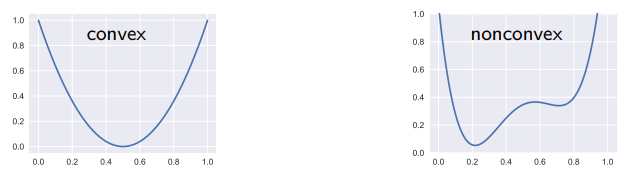

#### 1.5.3. 최적화 조건

* 미분 가능할 때(Square Loss): $\mathcal{L}(\theta)$를 $\theta$에 대해 미분했을 때 0이 되는 지점

$$\nabla \mathcal{L}(\theta) = 0$$

* 미분 불가능할 때(Absolute Loss): 좌측 미분계수($\mathcal{L}'_{-}(\theta)$)는 0보다 작거나 같고, 우측 미분계수($\mathcal{L}'_{+}(\theta)$)는 0보다 크거나 같은 지점

$$\mathcal{L}'_{-}(\theta)\le0 \quad \text{and} \quad \mathcal{L}'_{+}(\theta)\ge0$$

## **2. 제곱 손실(Square Loss)**

### 2.1. ERM 설정

제곱 손실은 큰 오차에 높은 페널티를 부여하며, 평균 제곱 오차(MSE) 최소화

$$\mathcal{L}(\theta)=\frac{1}{n}\sum_{i=1}^{n}(\theta-y^{i})^{2}$$

### 2.2. 최적 매개변수 유도

$\mathcal{L}(\theta)$는 미분 가능한 볼록 함수이므로, $\frac{d\mathcal{L}(\theta)}{d\theta} = 0$ 조건을 사용

&nbsp;

$$\frac{d\mathcal{L}(\theta)}{d\theta} = \frac{1}{n}\sum_{i=1}^{n} 2(\theta-y^{i}) = \frac{2}{n}\sum_{i=1}^{n} (\theta-y^{i}) = 0$$

$$\quad n\theta = \sum_{i=1}^{n} y^{i}$$



$$\theta^{*} = \frac{1}{n}\sum_{i=1}^{n}y^{i} = \text{Mean}(y)$$

&nbsp;

**결과:** 제곱 손실을 사용했을 때 최적의 상수 예측 변수는 데이터의 **산술 평균(Arithmetic Mean)**

### 2.3. 코드 예시

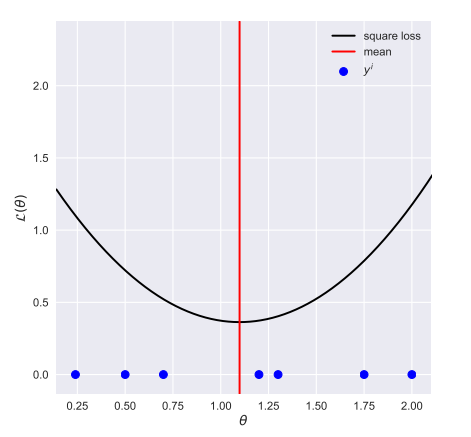

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 예시 데이터(슬라이드 10 기반)
Y = np.array([0.25, 0.5, 0.75, 1.15, 1.25, 1.75, 2.0])
n = len(Y)

# 2. 최적의 상수 예측 변수(평균) 계산
theta_opt = np.mean(Y)
print(f"데이터: {Y}")
print(f"최적의 상수 예측 변수(평균): {theta_opt:.4f}")

데이터: [0.25 0.5  0.75 1.15 1.25 1.75 2.  ]
최적의 상수 예측 변수(평균): 1.0929


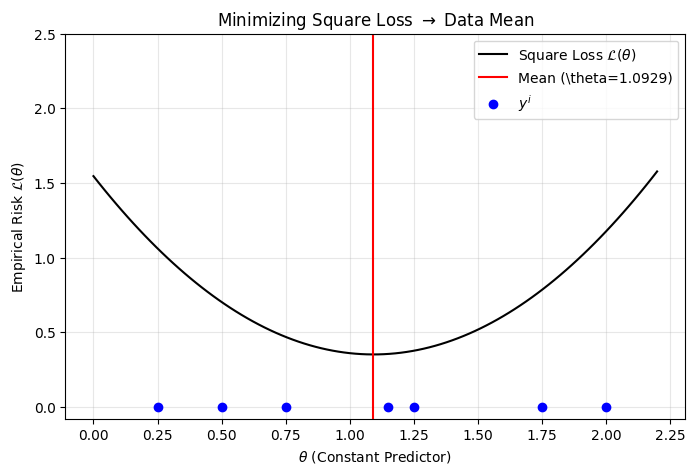

In [5]:
# 3. 경험적 위험 L(theta) 정의
def empirical_risk_square_loss(theta, Y):
    # L(theta) = Mean((theta - Y)**2)
    return np.mean((theta - Y)**2)

# 4. L(theta) 시각화: L(theta)가 평균값에서 최소가 됨을 확인
theta_range = np.linspace(0, 2.2, 100)
risk_values = [empirical_risk_square_loss(t, Y) for t in theta_range]

plt.figure(figsize=(8, 5))
plt.plot(theta_range, risk_values, label=r'Square Loss $\mathcal{L}(\theta)$', color='black')
plt.axvline(theta_opt, color='red', linestyle='-', label=f'Mean (\\theta={theta_opt:.4f})')
plt.scatter(Y, np.zeros_like(Y), color='blue', marker='o', label='$y^i$', zorder=5)

x_ticks = np.arange(0.0, 2.26, 0.25)
plt.xticks(x_ticks)
y_ticks = np.arange(0.0, 2.51, 0.5)
plt.yticks(y_ticks)

plt.title('Minimizing Square Loss $\\to$ Data Mean')
plt.xlabel(r'$\theta$ (Constant Predictor)')
plt.ylabel(r'Empirical Risk $\mathcal{L}(\theta)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## **3. 절대 손실(Absolute Loss)**

### 3.1. ERM 설정

절대 손실은 모든 오차에 선형적인 페널티를 부과하며, 평균 절댓값 오차(MAE) 최소화
$$\mathcal{L}(\theta)=\frac{1}{n}\sum_{i=1}^{n}|\theta-y^{i}|$$

### 3.2. 최적 매개변수 유도

$\mathcal{L}(\theta)$는 미분 불가능한 뾰족점(Kink Point)을 가지므로 좌우 미분계수 조건을 사용

&nbsp;

최적의 $\theta$는 다음 두 부등식을 모두 만족해야 함

$$\mathcal{L}'_{-}(\theta)\le0 \quad \text{and} \quad \mathcal{L}'_{+}(\theta)\ge0$$
&nbsp;

먼저 $\theta$를 기준으로 데이터 $y_i$를 두 그룹으로 나눔:    
$$|\theta - y_i| = \begin{cases} \theta - y_i & \text{ ($\theta > y_i$ 일 때)} \\ y_i - \theta & \text{ ($\theta < y_i$ 일 때)} \end{cases}$$
&nbsp;

이를 이용하여 $\mathcal{L}(\theta)=\frac{1}{n}\sum_{i=1}^{n}|\theta-y^{i}|$를 풀어쓰면,
$$\mathcal{L}(\theta) = \frac{1}{n} \left( \sum_{i: y_i < \theta} (\theta - y_i) + \sum_{i: y_i > \theta} (y_i - \theta) \right)$$
&nbsp;

$n_1$은 $\theta$보다 작은 데이터 개수, $n_2$는 $\theta$보다 큰 데이터 개수라고 하고,

$\mathcal{L}(\theta)$를 미분 불가능한 지점($\theta = y_i$)이 아닌 곳($\theta \ne y_i$)에서 $\theta$에 대해 미분
$$\frac{d}{d\theta} \mathcal{L}(\theta) = \frac{1}{n} \left( \sum_{i: y_i < \theta} \frac{d}{d\theta}(\theta - y_i) + \sum_{i: y_i > \theta} \frac{d}{d\theta}(y_i - \theta) \right)$$

$$\begin{align*} \sum_{i: y_i < \theta} \frac{d}{d\theta}(\theta - y_i) &= \sum_{i: y_i < \theta} 1 & = n_1 \\ \sum_{i: y_i > \theta} \frac{d}{d\theta}(y_i - \theta) &= \sum_{i: y_i > \theta} (-1) & = -n_2 \end{align*}$$

&nbsp;

따라서 일반적인 미분계수는
$$\frac{d}{d\theta} \mathcal{L}(\theta) = \frac{1}{n}(n_1 - n_2)$$
&nbsp;

**왼쪽 미분계수** $\mathcal{L}'_-(\theta)$는,  
$\theta$보다 아주 조금 왼쪽에서($\theta - \epsilon$)의 기울기를 의미하고, $n_1$을 기준으로 표현하면:  
* $n_1 - n_2 = n_1 - (n - n_1) = 2n_1 - n$이므로,

$$\mathcal{L}'_-(\theta) = \frac{2n_1}{n} - 1$$
&nbsp;

**오른쪽 미분계수** $\mathcal{L}'_+(\theta)$는,  
$\theta$보다 아주 조금 오른쪽에서($\theta + \epsilon$)의 기울기를 의미하고, $n_2$를 기준으로 표현하면:  
* $n_1 - n_2 = (n - n_2) - n_2 = n - 2n_2$이므로,  
$$\mathcal{L}'_+(\theta) = 1 - \frac{2n_2}{n}$$
&nbsp;

조건 $\mathcal{L}'_{-}(\theta)\le0 \quad \text{and} \quad \mathcal{L}'_{+}(\theta)\ge0$를 다시 정리하면 데이터의 중앙값(Median) 정의와 동일한 조건이 도출

$$\frac{n_{1}}{n}\le\frac{1}{2} \quad \text{and} \quad \frac{n_{2}}{n}\le\frac{1}{2}$$
&nbsp;

**결과:** 절대 손실을 사용했을 때 최적의 상수 예측 변수는 데이터의 **중앙값(Median)**

### 3.3. 코드 예시

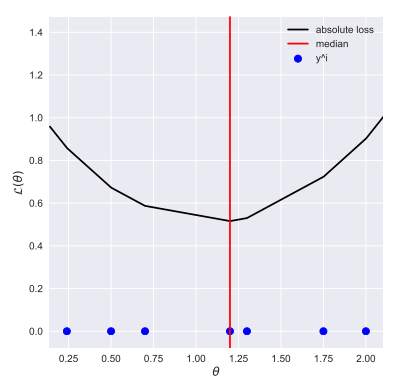

In [6]:
# 1. 예시 데이터 - 이전 셀에서 이미 선언
# Y = np.array([0.25, 0.5, 0.75, 1.15, 1.25, 1.75, 2.0])
# n = len(Y)

# 2. 최적의 상수 예측 변수(중앙값) 계산
theta_opt_abs = np.median(Y)
print(f"데이터: {Y}")
print(f"최적의 상수 예측 변수(중앙값): {theta_opt_abs:.4f}")

데이터: [0.25 0.5  0.75 1.15 1.25 1.75 2.  ]
최적의 상수 예측 변수(중앙값): 1.1500


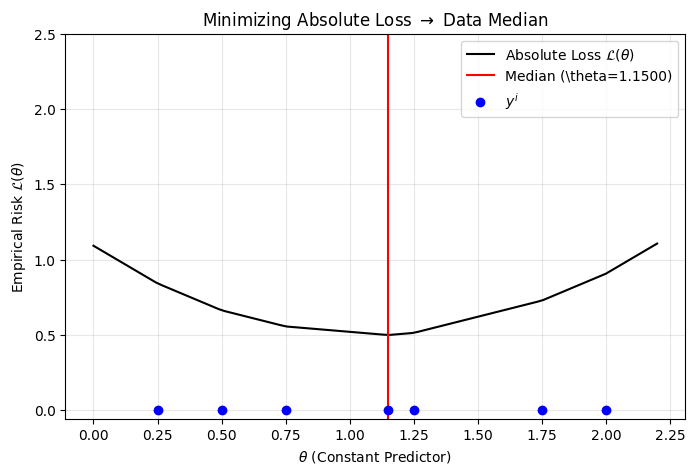

In [7]:
# 3. 경험적 위험 함수 L(theta) 정의
def empirical_risk_absolute_loss(theta, Y):
    # L(theta) = Mean(|theta - Y|)
    return np.mean(np.abs(theta - Y))

# 4. L(theta) 시각화: L(theta)가 중앙값에서 최소가 됨을 확인
theta_range = np.linspace(0, 2.2, 100)
risk_values_abs = [empirical_risk_absolute_loss(t, Y) for t in theta_range]

plt.figure(figsize=(8, 5))
plt.plot(theta_range, risk_values_abs, label=r'Absolute Loss $\mathcal{L}(\theta)$', color='black')
plt.axvline(theta_opt_abs, color='red', linestyle='-', label=f'Median (\\theta={theta_opt_abs:.4f})')
plt.scatter(Y, np.zeros_like(Y), color='blue', marker='o', label='$y^i$', zorder=5)

x_ticks = np.arange(0.0, 2.26, 0.25)
plt.xticks(x_ticks)
y_ticks = np.arange(0.0, 2.51, 0.5)
plt.yticks(y_ticks)

plt.title('Minimizing Absolute Loss $\\to$ Data Median')
plt.xlabel(r'$\theta$ (Constant Predictor)')
plt.ylabel(r'Empirical Risk $\mathcal{L}(\theta)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
# 5. 중앙값의 최적성 조건 확인 (n1/n <= 0.5 <= 1 - n2/n)
# n1: theta_opt보다 작은 값의 개수
n1 = np.sum(Y < theta_opt_abs)
# n2: theta_opt보다 큰 값의 개수
n2 = np.sum(Y > theta_opt_abs)
n = len(Y)

condition_n1 = n1 / n <= 0.5
condition_n2 = n2 / n <= 0.5
print("\n--- 중앙값 최적성 조건 확인 ---")
print(f"n1 (작은 값 비율): {n1}/{n} = {n1/n:.4f} (<= 0.5 충족: {condition_n1})")
print(f"n2 (큰 값 비율): {n2}/{n} = {n2/n:.4f} (<= 0.5 충족: {condition_n2})")
print(f"최종 조건 충족 여부: {condition_n1 and condition_n2}")


--- 중앙값 최적성 조건 확인 ---
n1 (작은 값 비율): 3/7 = 0.4286 (<= 0.5 충족: True)
n2 (큰 값 비율): 3/7 = 0.4286 (<= 0.5 충족: True)
최종 조건 충족 여부: True


## **4. 기울어진 절대 손실(Tilted Absolute Loss)**

### 4.1. ERM 설정

기울어진 절대 손실 또는 **핀볼 손실(Pinball Loss)** 은 분위수 매개변수 $\tau \in [0, 1]$를 사용하여 과소평가와 과대평가에 대한 페널티를 다르게 부과  

잔차를 $u = \hat{y} - y = \theta - y$로 놓고, 손실 함수 $p_{\tau}(u)$를 다음과 같이 정의

$$p_{\tau}(u)=\begin{cases} -\tau u & u < 0 \quad (\text{과소평가 시}) \\ (1-\tau)u & u \ge 0 \quad (\text{과대평가 시}) \end{cases}$$

| **상황** | **오차** ($u = y - \hat{y}$) | **적용되는 항** | **벌점 크기** | **설명** |
|:---------|:---------------------------:|:----------------:|:---------------:|:---------|
| **과소평가** | 예측이 실제보다 작음 ($\hat{y} > y$) → $u < 0$ | $-\tau u$ | $\tau$ 만큼 | 예측값이 작을수록 $u$는 큰 음수이므로, 벌점은 $\tau$에 비례하여 증가 |
| **과대평가** | 예측이 실제보다 큼 ($\hat{y} < y$) → $u \ge 0$ | $(1 - \tau)u$ | $(1 - \tau)$ 만큼 | 예측값이 클수록 $u$는 큰 양수이므로, 벌점은 $(1 - \tau)$에 비례하여 증가 |


* 이 손실 함수는 $\tau$ 값에 따라 오차 방향에 대한 페널티(기울기)를 다르게 부여  

* $\tau < 0.5$ (예: $\tau = 0.25$)
    * 과소평가 ($u < 0$) 페널티 (기울기): $\tau = 0.25$
    * 과대평가 ($u \ge 0$) 페널티 (기울기): $1 - \tau = 0.75$
    * 과대평가에 더 큰 페널티(0.75)가 부과되므로, ERM은 기대 손실을 최소화하기 위해 $\theta$ (파라미터이자 예측값)를 손실을 적게 내는 데이터 분포 아래쪽(예: 25분위수)으로 이동

* $\tau = 0.5$
    * 과소평가 ($u < 0$) 페널티 (기울기): $\tau = 0.5$
    * 과대평가 ($u \ge 0$) 페널티 (기울기): $1 - \tau = 0.5$
    * 양쪽 오차에 동일한 페널티, $\theta$는 중앙값

* $\tau > 0.5$ (예: $\tau = 0.75$)
    * 과소평가 ($u < 0$) 페널티 (기울기): $\tau = 0.75$
    * 과대평가 ($u \ge 0$) 페널티 (기울기): $1 - \tau = 0.25$
    * 과소평가에 더 큰 페널티(0.75)가 부과되므로, ERM은 기대 손실을 최소화하기 위해 $\theta$를 데이터 분포 위쪽(예: 75분위수)으로 이동

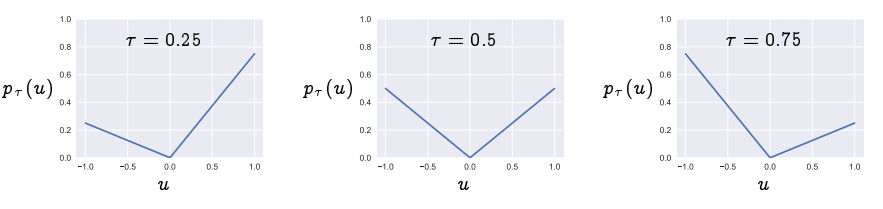

### 4.2. 최적 매개변수 유도

$\mathcal{L}(\theta)$는 미분 불가능한 뾰족점(Kink Point)을 가지므로 최적의 $\theta$는 좌우 미분계수 조건을 만족해야 함

$$\mathcal{L}'_{-}(\theta)\le0 \quad \text{and} \quad \mathcal{L}'_{+}(\theta)\ge0$$
&nbsp;

잔차가 $u = \hat{y} - y = \theta - y$이므로

$$p_{\tau}(u)=\begin{cases} -\tau u & = -\tau (\theta - y^i) & u < 0 \quad (\text{과소평가 시}) \\ (1-\tau)u & = (1 - \tau)(\theta - y^i) & u \ge 0 \quad (\text{과대평가 시}) \end{cases}$$
&nbsp;

이를 이용하여 $\mathcal{L}(\theta)$를 풀어쓰면,
$$\mathcal{L}(\theta) = \frac{1}{n} \left( \sum_{i: y^i \le \theta} (1 - \tau)(\theta - y^i) + \sum_{i: y^i > \theta} (-\tau)(\theta - y^i) \right)$$
&nbsp;

$n_1$은 $\theta$보다 작은 데이터 개수, $n_2$는 $\theta$보다 큰 데이터 개수라고 하고,  

$\mathcal{L}(\theta)$를 미분 불가능한 지점($\theta = y_i$)이 아닌 곳에서 $\theta$에 대해 미분

* $y^i \le \theta$ 영역 미분: $\frac{d}{d\theta}(1 - \tau)(\theta - y^i) = 1 - \tau$
* $y^i > \theta$ 영역 미분: $\frac{d}{d\theta}(-\tau)(\theta - y^i) = -\tau$
&nbsp;

따라서 일반적인 미분계수는    
$$\frac{d}{d\theta}\mathcal{L}(\theta) = \frac{1}{n} \left( n_1(1 - \tau) + n_2(-\tau) \right)$$
&nbsp;


**왼쪽 미분계수** $\mathcal{L}'_{-}(\theta)$는,  
$n_1 + n_2 = n$를 이용하여 $n_2$를 $n$과 $n_1$으로 치환하여 정리하면,
$$\mathcal{L}'_{-}(\theta) = \frac{n_1}{n} - \tau$$
&nbsp;

**오른쪽 미분계수** $\mathcal{L}'_{+}(\theta)$는,   
$n_1$을 $n$과 $n_2$로 치환하여 정리하면,
$$\mathcal{L}'_{+}(\theta) = 1 - \tau - \frac{n_2}{n}$$
&nbsp;

조건 $\mathcal{L}'_{-}(\theta)\le0$과 $\mathcal{L}'_{+}(\theta)\ge0$을 다시 정리하면, 최적의 $\theta$는 다음 조건을 만족하는 $\tau$-분위수($\tau$-Quantile)가 됨
$$\frac{n_{1}}{n}\le\tau\le1-\frac{n_{2}}{n}$$
&nbsp;

**(참고)** $\theta$가 $\tau$-분위수이기 위한 조건:
$$\frac{n_1}{n} \le \tau \quad \text{and} \quad \frac{n_2}{n} \le 1 - \tau$$

### 4.3. 코드 예시

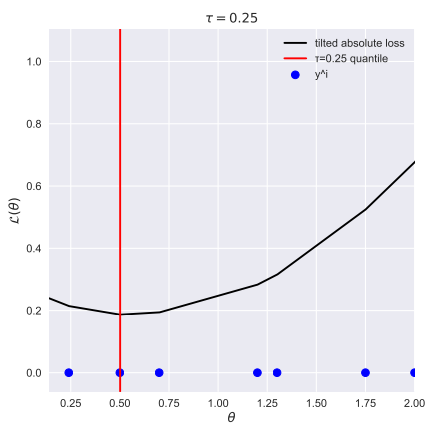

In [9]:
# 0. 예시 데이터 - 이전 셀에서 이미 선언
# Y = np.array([0.25, 0.5, 0.75, 1.15, 1.25, 1.75, 2.0])
# n = len(Y)

# 1. 분위수 매개변수 설정: tau = 0.25 (25분위수 예측 목표)
tau = 0.25

# 2. 최적의 상수 예측 변수(0.25 분위수) 계산
theta_opt_quantile = np.quantile(Y, tau)
print(f"데이터: {Y}")
print(f"선택된 tau: {tau}")
print(f"최적의 상수 예측 변수({tau} 분위수): {theta_opt_quantile:.4f}")

데이터: [0.25 0.5  0.75 1.15 1.25 1.75 2.  ]
선택된 tau: 0.25
최적의 상수 예측 변수(0.25 분위수): 0.6250


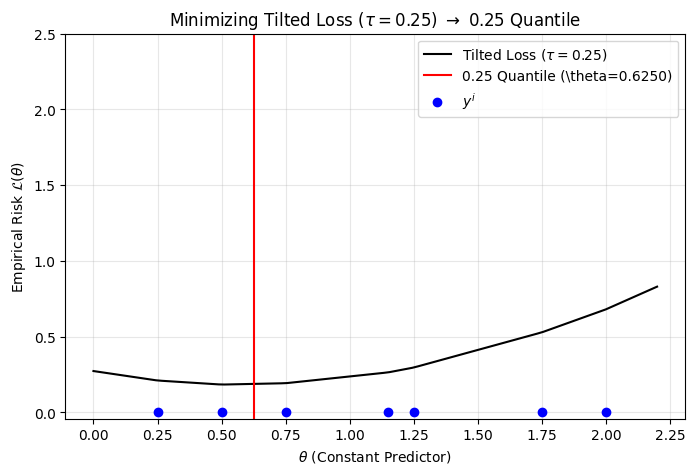

In [10]:
# 3. 경험적 위험 함수 L(theta) 정의
def empirical_risk_quantile_loss(theta, Y, tau):
    # 잔차 u = theta - Y
    u = theta - Y

    # p_tau(u) = (1-tau)*max(u, 0) + tau*max(-u, 0)
    # (u >= 0, 과대평가 시) -> (1-tau)*u
    # (u < 0, 과소평가 시) -> tau*(-u)
    loss = (1 - tau) * np.maximum(u, 0) + tau * np.maximum(-u, 0)
    return np.mean(loss)

# 4. L(theta) 시각화
theta_range = np.linspace(0, 2.2, 100)
risk_values_quantile = [empirical_risk_quantile_loss(t, Y, tau) for t in theta_range]

plt.figure(figsize=(8, 5))
plt.plot(theta_range, risk_values_quantile, label=r'Tilted Loss ($\tau=0.25$)', color='black')
plt.axvline(theta_opt_quantile, color='red', linestyle='-', label=f'{tau} Quantile (\\theta={theta_opt_quantile:.4f})')
plt.scatter(Y, np.zeros_like(Y), color='blue', marker='o', label='$y^i$', zorder=5)

x_ticks = np.arange(0.0, 2.26, 0.25)
plt.xticks(x_ticks)
y_ticks = np.arange(0.0, 2.51, 0.5)
plt.yticks(y_ticks)

plt.title(f'Minimizing Tilted Loss ($\\tau={tau}$) $\\to$ {tau} Quantile')
plt.xlabel(r'$\theta$ (Constant Predictor)')
plt.ylabel(r'Empirical Risk $\mathcal{L}(\theta)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## **5. 분수 손실(Fractional Loss)**

### 5.1. ERM 설정

$$\mathcal{L}(\theta) = \frac{1}{n}\sum_{i=1}^{n} \max \left\{ \frac{\theta}{y^i}-1, \frac{y^i}{\theta}-1 \right\}$$

### 5.2. 최적 매개변수 유도

데이터 ${y^1, \dots, y^n}$를 크기 순으로 정렬했다고 가정    
$(\theta$를 기준으로 $k$번째 데이터까지는 $\theta \ge y^i$, $k+1$번째 데이터부터는 $\theta < y^i$)

$$\mathcal{L}(\theta) = \frac{1}{n}\sum_{i=1}^{n} \max \left\{ \frac{\theta}{y^i}-1, \frac{y^i}{\theta}-1 \right\}$$
&nbsp;

$\theta$를 기준으로 두 영역으로 분리하여 $\mathcal{L}(\theta)$를 풀어쓰면,    $$\mathcal{L}(\theta) = \underbrace{\frac{1}{n} \sum_{i=1}^{k} \left( \frac{y^i}{\theta} - 1 \right)}_{\text{영역 1: } y^i \le \theta \text{ (분모가 커서 } y^i/\theta \text{가 선택됨)}} + \underbrace{\frac{1}{n} \sum_{i=k+1}^{n} \left( \frac{\theta}{y^i} - 1 \right)}_{\text{영역 2: } y^i > \theta \text{ (분자가 커서 } \theta/y^i \text{가 선택됨)}}$$
&nbsp;

상수항 분리하고 정리    
(여기서 $-1$은 $n$번 더해져 $-\frac{n}{n} = -1$)
$$\mathcal{L}(\theta) = -1 + \frac{1}{n} \sum_{i=1}^{k} \frac{y^i}{\theta} + \frac{1}{n} \sum_{i=k+1}^{n} \frac{\theta}{y^i}$$
&nbsp;

최적해 $\theta^*$를 찾기 위해 $\mathcal{L}(\theta)$를 $\theta$에 대해 미분(상수항 제거)    

$$\mathcal{L}'(\theta) = \frac{d}{d\theta} \left( \frac{1}{n} \sum_{i=1}^{k} y^i \cdot \theta^{-1} + \frac{1}{n} \sum_{i=k+1}^{n} \frac{1}{y^i} \cdot \theta \right)$$
&nbsp;

$$\mathcal{L}'(\theta) = -\frac{1}{\theta^2} \left( \frac{1}{n} \sum_{i=1}^{k} y^i \right) + \frac{1}{n} \sum_{i=k+1}^{n} \frac{1}{y^i}$$
&nbsp;

$\mathcal{L}(\theta)$가 볼록 함수이므로, 최소점 $\theta^*$는 $\mathcal{L}'(\theta) = 0$인 지점

$$-\frac{1}{\theta^2} \left( \frac{1}{n} \sum_{i=1}^{k} y^i \right) + \frac{1}{n} \sum_{i=k+1}^{n} \frac{1}{y^i} = 0$$
&nbsp;

$\frac{1}{n}$ 소거하고 $\theta^2$에 대해 정리

$$\theta^2 = \frac{\sum_{i=1}^{k} y^i}{\sum_{i=k+1}^{n} 1/y^i}$$
&nbsp;

$\theta$는 양수여야 하므로, 최종적으로 분수 중간값 공식이 유도

$$\theta^{*} = \left( \frac{\sum_{i=1}^{k} y^i}{\sum_{i=k+1}^{n} 1/y^i} \right)^{1/2}$$
&nbsp;

**결과:** 분수 손실을 사용했을 때 최적의 상수 예측 변수는 데이터의 **분수 중간값(Fractional Middle**, '분수(비율) 오차'의 관점에서 양쪽 그룹의 영향력이 균형을 이루는 지점 정도로 이해하면 될 듯?)

### 5.3. 코드 예시

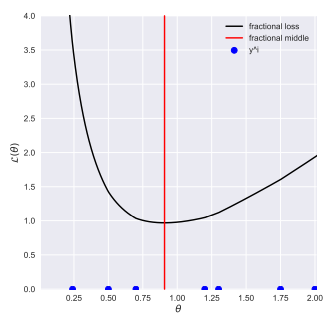

In [11]:
from scipy.optimize import minimize_scalar

# 1. 예시 데이터 - 이전 셀에서 이미 선언
# Y = np.array([0.25, 0.5, 0.75, 1.15, 1.25, 1.75, 2.0])
# n = len(Y)

# 2. 경험적 위험 함수 L(theta) 정의
def empirical_risk_fractional_loss(theta, Y):
    # L(theta) 함수는 theta > 0 에서만 정의됨
    if theta <= 0:
        return np.inf

    # L(theta) = Mean(max(theta/Y - 1, Y/theta - 1))
    r = theta / Y
    loss = np.maximum(r - 1, 1 / r - 1)
    return np.mean(loss)

# 3. 최적의 상수 예측 변수(분수 중간값) 계산
# 수치적 최적화 함수(minimize_scalar)를 사용하여 최소점 찾기(분석적 해 공식은 복잡하므로 실습에서는 수치적 방법을 사용)
try:
    result = minimize_scalar(empirical_risk_fractional_loss, args=(Y,), bounds=(0.01, 3.0), method='bounded')
    theta_opt_frac = result.x
except NameError:
    # Y가 선언되지 않았을 경우를 대비한 더미 데이터
    Y = np.array([0.25, 0.5, 0.75, 1.15, 1.25, 1.75, 2.0])
    result = minimize_scalar(empirical_risk_fractional_loss, args=(Y,), bounds=(0.01, 3.0), method='bounded')
    theta_opt_frac = result.x

print(f"데이터: {Y}")
print(f"최적의 상수 예측 변수(분수 중간값): {theta_opt_frac:.4f}")

데이터: [0.25 0.5  0.75 1.15 1.25 1.75 2.  ]
최적의 상수 예측 변수(분수 중간값): 0.9158


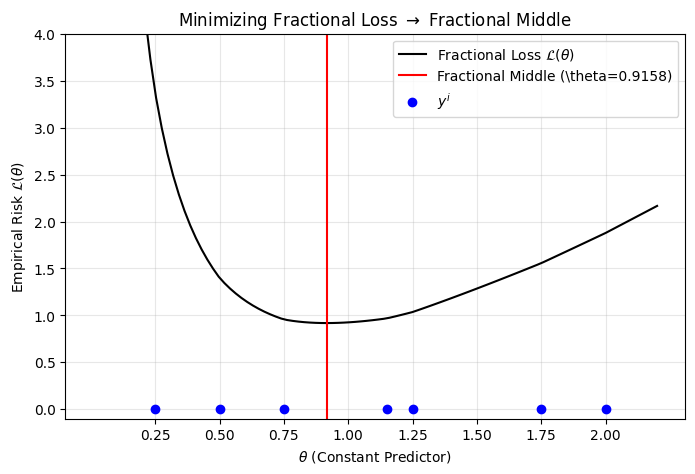

In [12]:
# 4. L(theta) 시각화
theta_range = np.linspace(0.01, 2.2, 100)
risk_values_frac = [empirical_risk_fractional_loss(t, Y) for t in theta_range]

plt.figure(figsize=(8, 5))
plt.plot(theta_range, risk_values_frac, label=r'Fractional Loss $\mathcal{L}(\theta)$', color='black')
plt.axvline(theta_opt_frac, color='red', linestyle='-', label=f'Fractional Middle (\\theta={theta_opt_frac:.4f})')
plt.scatter(Y, np.zeros_like(Y), color='blue', marker='o', label='$y^i$', zorder=5)

x_ticks = np.arange(0.25, 2.01, 0.25)
plt.xticks(x_ticks)
y_ticks = np.arange(0.0, 4.01, 0.5)
plt.yticks(y_ticks)
plt.ylim(-0.1, 4.0)

plt.title('Minimizing Fractional Loss $\\to$ Fractional Middle')
plt.xlabel(r'$\theta$ (Constant Predictor)')
plt.ylabel(r'Empirical Risk $\mathcal{L}(\theta)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## **6. 요약**

<style>
    .erm-table {
        border-collapse: collapse;
        width: 100%;
        font-family: Arial, sans-serif;
        border: 1px solid #555;
    }
    .erm-table th, .erm-table td {
        border: 1px solid #555;
        padding: 10px 12px;
        text-align: left;
    }
    .erm-table th {
        background-color: #333;
        color: #FFF;
        font-weight: bold;
    }
    .erm-table tr:nth-child(even) {
        background-color: #2a2a2a;
        color: #FFF;
    }
    .erm-table tr:nth-child(odd) {
        background-color: #3c3c3c;
        color: #FFF;
    }
    .erm-table td:nth-child(2), .erm-table td:nth-child(3) {
        font-family: "Consolas", "Courier New", monospace;
    }
</style>

<table class="erm-table">
    <thead>
        <tr>
            <th>손실 함수 (Loss)</th>
            <th>ERM 결과 &theta;<sup>*</sup></th>
            <th>목적 (Bias)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>제곱 손실 (Square Loss)</strong></td>
            <td><strong>평균 (Mean)</strong></td>
            <td>MSE 최소화</td>
        </tr>
        <tr>
            <td><strong>절대 손실 (Absolute Loss)</strong></td>
            <td><strong>중앙값 (Median)</strong></td>
            <td>MAE 최소화</td>
        </tr>
        <tr>
            <td><strong>기울어진 절대 손실 (Tilted Loss)</strong></td>
            <td><strong>분위수 (<i>&tau;</i>-Quantile)</strong></td>
            <td>과소/과대평가 페널티 불균형 조정</td>
        </tr>
    </tbody>
</table>

**결론:** Constant Predictor 분석은 손실 함수 선택이 모델의 복잡성과 무관하게 달성하고자 하는 목표를 정의하는 데 결정적임을 보여준다.